# <span style="color:blue"> Laboratorio 7 - Dinamica Molecolare - NVT</span>

In [33]:
import numpy as np
import random
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy.stats import expon
from pylab import *
from scipy.optimize import curve_fit

***Osservazione*** : nella cartella `Laboratorio7` è presente sia il codice per svolgere una simulazione `NVT`(*Lab4*), che quello per svolgere una simulazione `NVE`(*Lab8*). I dati di *input*  sono comuni a entrambi le simulazioni **MA** è necessario specificare se si svolge `NVT` o `NVE` ogni volta;i file di *output* di ciascuna simulazione sono salvati nelle cartelle chiamate rispettivamente `NVE` e `NVT`.

## Ensamble Microcanonico NVT


La simulazione è stata fatta nell' ipotesi che il  sistema sia un ***Ensamble Canonico***.

DAl punto di vista *macroscopico* esso rappresenta un ensamble in cui il sistema è a contatto con un bagno termico a **Temperatura $T$** fissata, con il quale può scambiare energia. 


***Osservazione*** : L'algoritmo che muove ogni passo è un algoritmo di Metropolis. Inoltre le simulazioni sono Simulazioni Montecralo: a differenza di quanto fatto nel [Laboratorio 4](https://github.com/ChiaraBallotta/LSN_Ballotta_Chiara/blob/master/Laboratorio4/Ex-4.ipynb), ogni mossa non viene fatta mediante l'Algoritmo di Verlet (ovvero simulando la dinamica molecolare) ma viene fatta mediante un algoritmo di *Metropolis* dove è campionato il **peso statistico di Bolzmann** .

Le differenze tra le simulazioni svolte nei due laboratori sono sintetizzate come segue:

-*Laboratorio 4* : ensamble microcanonico; equazioni del moto risolte con tecniche di dinamica molecolare : Algoritmo di Verlet.

-*Laboratorio 7*: ensamble canonico; simulazione MC campionando il peso di Bolzmann con l'algoritmo di Metropolis.

## Exercise 07.1

Durante il [Laboratorio 4](https://github.com/ChiaraBallotta/LSN_Ballotta_Chiara/blob/master/Laboratorio4/Ex-4.ipynb) è stato definito `rcut`: ovvero la distanza oltre alla quale si considera nulla l'interazione tra coppie di particelle.

All'interno dell' esercizio sono state introdotte delle **tail correction** per compensare la assenza di potenziale a lungo raggio: corregge quindi eventuali sovrastime/sottostime causate dalla presenza del raggio di *cut-off*. Tali correzzioni sono applicate alla valutazione dell'*Energia Potenziale* e della *Pressione*.

Per un potenziale di Lennard-Jones queste correzioni valgono rispettivamente:



$$
\frac{\langle V_{LJ} \rangle _{tail}}{N}   = \frac{8\pi\rho}{9 r_c^9} - \frac{8\pi\rho}{3 r_c^3}
    \qquad \qquad \frac{\langle W \rangle _{tail}}{3N}   = 32\pi\rho        \left[            \frac{1}{9 r_c^9}           - \frac{1}{6 r_c^3}        \right]
$$
dove $\rho$ e $r_c$ sono in unità di $\sigma_{LJ}$. Come nell'*esercitazione 4*, uso $\sigma=\epsilon = 1$ .



Per il calcolo delle tail correction ho creato $2$ funzioni : `tail_corr_W()` e `tail_corr_V()`. 
   Le *tail corrections* sono inserite nel seguente modo, nel calcolo del **Potenziale U** e della **Pressione P**: 
$$ U_{tot} = U_{LJ} + \langle V_{LJ} \rangle _{tail} \qquad \qquad 
P_{tot} = P_{virale} + \frac{\langle W \rangle _{tail}}{3V}
$$

dove $U_{LJ}$ è il potenziale di *Lennard-Jones*; $P_{viriale}$ è la pressione calcolata mediante il teorema del viriale; $V$ è il volume del sistema.



## Exercise 07.2
Il codice appena implementato è stato utilizzato per analizzare l' andamento di $U/N$ e $P$ in funzione degli step di Montecarlo. Durante la simulazione sono stati utilizzati $M=5\times 10^5$ MC steps (`nstep`$=1$ e `nblk`$=5\times 10^5$) dove l'*acceptance rate* del Metropolis fissata al 50%.

I parametri utilizzati sono gli stessi usati in [Laboratorio 4](https://github.com/ChiaraBallotta/LSN_Ballotta_Chiara/blob/master/Laboratorio4/Ex-4.ipynb), sotto le seguenti condizioni termodinamiche:

- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

dove il simbolo $\star$ indica che le grandezze sono espresse in unità di *LJ*.

La configurazione iniziale è quella del reticolo cristallino fcc , salvata sul file `config.in`.

***Osservazione***: l' ampiezza `delta` (settata nel file `MD_MC.h` a differenza di quanto accade nel *Lab4* ) indica l'ampiezza della mossa proposta dall' algoritmo di Metropolis ( dove la probabilità di Transizione è uniforme sulle tre cordinate). Il suo valore deve essere scelto in modo tale che il tasso di accettazione sia del $50\%$. 

Dopo aver studiato il tasso di accettazione del sistema, i `delta` utilizzati durante le 3 fasi sono i seguenti:

|         | **Solido** | **Liquido** | **Gas** |
|---------|------------|-------------|---------|
| `delta` |0.11|0.20|6.0|
| *acceptance rate* | 0.51|0.51|0.62|


Il passo fissato per la fase gassosa ha un *acceptance rate* del $62\%$ circa; purtroppo non è possibile alzare maggiormente il valore di `delta` per evitare che superi la metà della dimensione del box ($l_{box}\simeq 13$).
Il fatto che la `delta` relativa alla fase gassosa sia cosi alta, è imputabile al fatto che il sistema, per la sua natura stessa, è molto diluito e l' interazione tra le particelle è meno significativa e dunque la probabilità di accettazione rimane molto elevata.

Nel file `input_<fase>.dat` è settato un valore della delta che non viene utilizzato nel caso in cui la simulazione è *NVT*.

Anche in questo caso, è necessaria una prima fase di *Equilibrizzazione*. Per una spiegazione completa, vedi [Laboratorio 4](https://github.com/ChiaraBallotta/LSN_Ballotta_Chiara/blob/master/Laboratorio4/Ex-4.ipynb)
### Equilibrizzazione

All' interno dei file di input è stato già settata  `temp` $=T^\star$. 

Per studiare la fase di equilibrio plotto l' andamento dell'*energia potenziale*. Non ha infatti senso plottare la *tempertura* dal momento che l' ensamble è *canonico* e dunque rimane costante.

La fase di equilibrizzazione è stata effettuata con $N_{step}=2000$.

I dati ottenuti durante la fase di Equilibrazione sono salvati **manualmente** nei file `NVT/Dati_sim/07.2/<Fase>/simulaz_eq_<T/U>.dat`

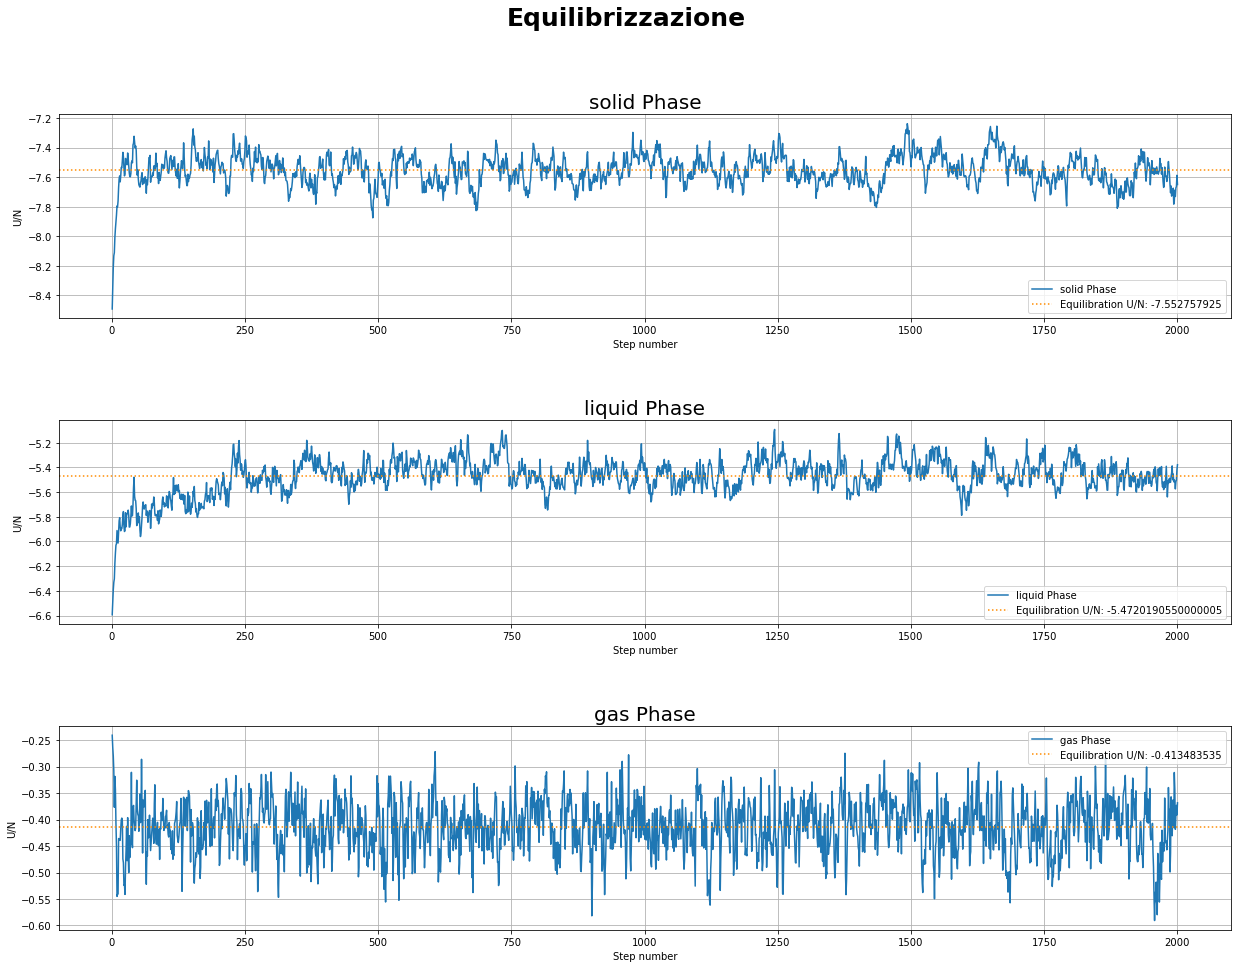

In [14]:
temp_target = [0.8 , 1.1 , 1.2]
Fase = ["solid", "liquid", "gas"]
ave = np.array([0.0,0.0,0.0])


plt.figure(figsize=(21,15))
plt.suptitle("Equilibrizzazione",fontweight = "bold", fontsize = 25)

#plotting delle simulazioni, relative alle tre fasi

for i in range (3) :
    plt.subplot(3,1,i+1)
    N, pot = np.loadtxt("Ex-7/NVT/Dati_sim/07.2/"+ Fase[i] + "/simulaz_eq.dat",usecols = (0,1), delimiter = None, unpack = 'true')
    ave[i] = np.mean(pot)
    plt.plot(N,pot ,label=Fase[i] + " Phase")
    plt.title(Fase[i] + " Phase", fontsize = 20)
    plt.axhline(y = ave[i], color ="darkorange", label = "Equilibration U/N: "+str(ave[i]), linestyle = ':')
    plt.xlabel('Step number')
    plt.ylabel('U/N')
    plt.grid(True)
    plt.legend()
    
plt.subplots_adjust(hspace=0.5) #separa la griglia di grafici
plt.show() 

Dai grafici deduco che l' equilibrio viene raggiunto dopo un centinaio di step MC  per tutte e tre le fasi. 

Decreto quindi conclusa la fase di equilibrizzazione.

 Dopo aver concluso la fase di *equilibrizzazione*, è stata esguita la stampa di $M=5\times 10^5$ valori istantanei di **U/N** (`nstep`$=1$ e `nblk`$=5\times 10^5$) che sono poi stati utilizzati per fare effettuare due differenti analisi statistiche il cui obbiettivo è stimare il corretto numero di blocchi e la corretta lunghezza dei blocchi affinche i risultati possano ritenersi statisticamente validi.
 
I risultati della simulazione sono stati salvati nella cartella `Dati_sim/07.2/<fase>`.

### 1. Autocorrelazione
Idealmente, vorrei fare in modo che gli step di MC siano statisticamente scorrelati tra di loro. Studio quindi la correlazione tra le simulazioni per individuare il *numero di step MC*, che poi sarà necessario fare in ciascun blocco, necessari affinche i risultati non siano correlati.

Per una catena di Markov MC, è possibile calcolare la correlazione di una quantità di interesse $g(t)$ come:
$$
\chi(t) = \frac{\frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t}g(t')g(t'+t)-\frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t}g(t')\times\frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t}g(t'+t)}{\frac{1}{t_{max}}\sum_{t'=0}^{t_{max}}g^2(t') - \left(\frac{1}{t_{max}}\sum_{t'=0}^{t_{max}}g(t')\right)^2}
$$

dove $t_{max}$  indica il numero totale di step MC.

La funzione $\chi(t)$ fornisce un'idea di quanto i risultati della grandezza $g$, prodotti in successione dall'algoritmo di Metropolis sino scorrelati tra di loro, il tutto in funzione del numero di step $t$ che li separano.
Gli step di MC possono essere intesi come una variabile temporale crescente.
Mi aspetto che la correlazione sia positiva per configurazioni separate da pochi step temporali, mentre tende a annullarsi per configurazione la cui distanza temporale è grande $\rightarrow$ la funzione $\chi(t)$ dovrebbe scalare con un andamento **esponenziale** : $\chi(t) = exp(-\frac{t}{t_c})$ dove $t_c$ è il tempo di correlazione che mi interessa calcolare.

Una volta individuato $t_c$ è quindi possibile fissare il parametro `nstep` , ovvero la lunghezza di ciascun blocco, affinchè le configurazioni non siano correlate.

Di seguito sono illustrati i dati che riportano l'autocorrelazione:

In [42]:
#===== Funzione che calcola chi(t)--> t e tmax sono gli indici di due posizioni dell' array g
def autocorrelation(g,t,tmax):           #g è u array dove ogni elemento è relativo all' isiatnte t'
    den = 1.0/(tmax-t)
    den2 = 1.0/(tmax)
    ave1 = 0       #summ g(i)g(i+t)
    ave2 = 0       #summ g(i)
    ave3 = 0       #summ g(i + t)
    ave4 = 0       #summ g^2(i) (0,tmax)
    ave5 = 0       #summ g(i) ( 0,tmax)
    for i in range (0,tmax-t):
        ave1 +=g[i]*g[i+t]
        ave2 += g[i]
        ave3 += g[i+t]
    for i in range (0,tmax):
        ave4 += g[i]*g[i]
        ave5 += g[i]
    numerator = den*ave1 - den*ave2*den*ave3
    denominator  = den2*ave4 - pow(den2*ave5,2)
    return numerator/denominator 

#===== Fitting esponenziale======
def exponential(x, a, k,b):
    return a*np.exp(x*k) +b

Per ridurre i tempi di esecuzione ho plottato solo $1000$ delle $500000$ simulazioni svolte. Le simulazioni non incluse infatti non forniscono alcuna informazione aggiuntiva.

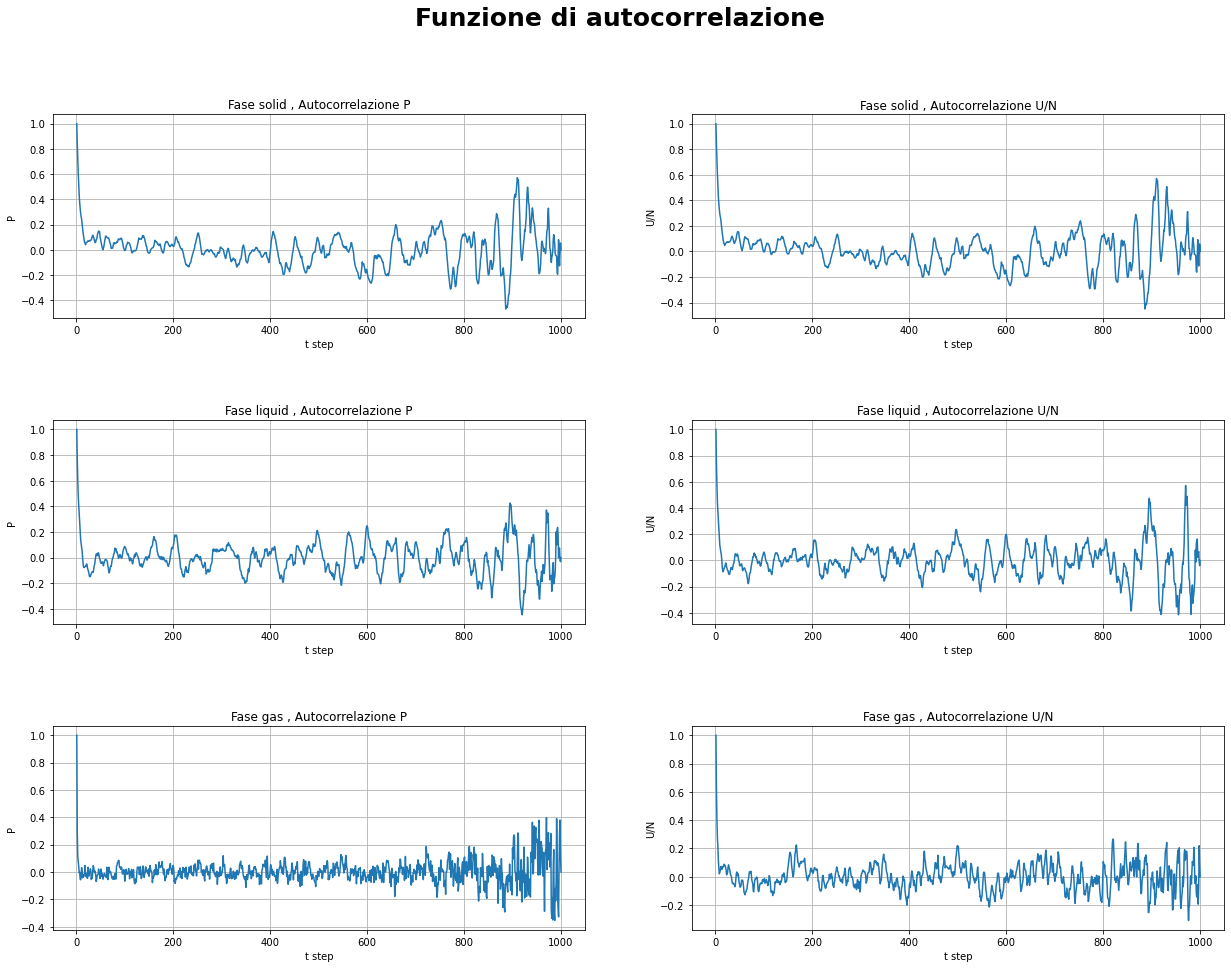

In [50]:
import statsmodels.api as sm

tmax = 1000
n_punti=int(tmax/500)
p=np.linspace(0,n_punti, n_punti)

plt.figure(figsize=(21,15))
plt.suptitle("Funzione di autocorrelazione",fontweight = "bold", fontsize = 25)

graph = 1

for f in range ( 0,3):
    nblk,ave_P = np.loadtxt("Ex-7/NVT/Dati_sim/07.2/"+Fase[f]+"/output_press.dat", usecols = (0,1), delimiter = None, unpack = 'true',max_rows = tmax)
    nblk,ave_U = np.loadtxt("Ex-7/NVT/Dati_sim/07.2/"+Fase[f]+"/output_epot.dat", usecols = (0,1), delimiter = None, unpack = 'true',max_rows = tmax)
# prendo la colonna 2 siccome non mi interessa la media progressiva
    chi_P = np.zeros(tmax)    # contiene la chi per ogni step
    chi_U = np.zeros(tmax) 
    
    for i in range(0,tmax):
        chi_P[i] = autocorrelation(ave_P,i,tmax)
        chi_U[i] = autocorrelation(ave_U,i,tmax)
    
    plt.subplot(3,2,graph)
    plt.plot(nblk,chi_P)
    plt.title("Fase "+Fase[f]+" , Autocorrelazione P")
    plt.xlabel('t step')
    plt.ylabel('P')
    plt.grid(True)
    graph +=1
    
        #Fitting 
    #g= scipy.optimize.curve_fit(exponential,nblk,chi_P)
    #x = np.linspace(0, 200, 200)
    #y = g[0][0]*np.exp(x*g[0][1])
    #plt.plot(x,y, label='fit')
    #print('tempo di correlazione pressione: ', 1/g[0][1])
    
    plt.subplot(3,2,graph)
    plt.plot(nblk,chi_U)
    plt.title("Fase "+Fase[f]+" , Autocorrelazione U/N")
    plt.xlabel('t step')
    plt.ylabel('U/N')
    plt.grid(True)
    graph +=1
    #Fitting 
    #g= scipy.optimize.curve_fit(exponential, nblk, chi_U)
    #x = np.linspace(0, 200, 200)
    #y = g[0][0]*np.exp(x*g[0][1])
    #plt.plot(x,y, label='fit')
    #print('tempo di correlazione energia potenziale: ', 1/g[0][1])
    
plt.subplots_adjust(hspace=0.5) #separa la griglia di grafici
plt.show()
                 
#
    

Dai grafici  sopra si oosserva che la correlazione tende rapidamente a $0$. Come mostrato dal fitting, la lunghezza di ciascun blocco, necessaria affinche i  dati siano scorrelati, deve essere di almeno $2\times t_c$ e dunque di circa `nstep`$\gg 200$.

La *correlazione* per la fase gassosa  converge più velocemente; questo è imputabile al moto caotico delle particelle che porta le configurazioni a scorrelarsi più velocemente.

### 2. Incertezze statistiche

Usando gli stessi dati usati in precedenza, compio un'analisi delle incertezze statistiche, sul valore di aspettazione di **U/N** e **P**, in funzione della lunghezza dei blocchi. Questo viene fatto per assicurarsi che con il valore preseclto di `nstep` valga ancora il *Teorema del limite centrale* quando si effettua il data-blocking.

E' stato quindi realizzato un plot delle stime delle incertezze statistiche dei valori si aspettazione di **U/N** calcolate per differente lunghezza dei blocchi nel data-blocking: da `nstep`$=M/N = 10$ fino a `nstep`$=5\times 10^3$ ( dove 10^3 è stato scelto tenendo in considerazione le considerazioni fatte nel punto **1.**), dove $N$ è il numero dei blocchi `nblk`.

Il valore di `nstep` per cui il grafico satura sarà quello ottimale:
- I dati sono sufficientemente scorrelati ( nell' ipotesi in cui `nstep`$\gg 200$)
- le ipotesi del teorema del limite centrale sono soddisfatte

**N.B.** mi aspetto che il grafico saturi proprio per il teorema del limite centrale, mentre nella fase antecedente alla saturazione le incertezze sono sottostimate.

L' incertezza statistica è data seguente formula:

$$
\sigma = \sqrt{\frac{1}{N-1}\biggl[\frac{1}{N}\sum_{i=1}^N g_i^2-\biggl(\frac{1}{N}\sum_{i=1}^N g_i\biggr)^2\biggr]}
$$

In [66]:
L = []
L_min = 10
L_max = 5000
M =500000

for i in range(L_min, L_max +1):
    if(M%i ==0):     # L deve assumere un valore intero
        L.append(int(i))

print(L)

[10, 16, 20, 25, 32, 40, 50, 80, 100, 125, 160, 200, 250, 400, 500, 625, 800, 1000, 1250, 2000, 2500, 3125, 4000, 5000]


In [78]:
#====== Calcolo Errore =======
def Error(ave, ave2, N):
    return np.sqrt((ave2/N-ave.mean()*ave.mean())/(N))

def sigma_data_block(data , L_vec):            #L_vec = vettore con lunghezza dei blocchi L
    err = np.empty(len(L_vec))
    for l in range(0,len(L_vec)):
        N = int(len(data)/L_vec[l])          # inversione di L = M/N; N = numero blocchi
        ave=np.zeros(N)
        ave2 = 0
        
        for i in range(N):
            for j in range(L_vec[l]):
                ave[i] += data[j+i*L_vec[l]]
                
            ave[i]/=L_vec[l]    
            ave2 += ave[i]*ave[i] 
        err[l] = Error(ave,ave2,N)
    
    return err

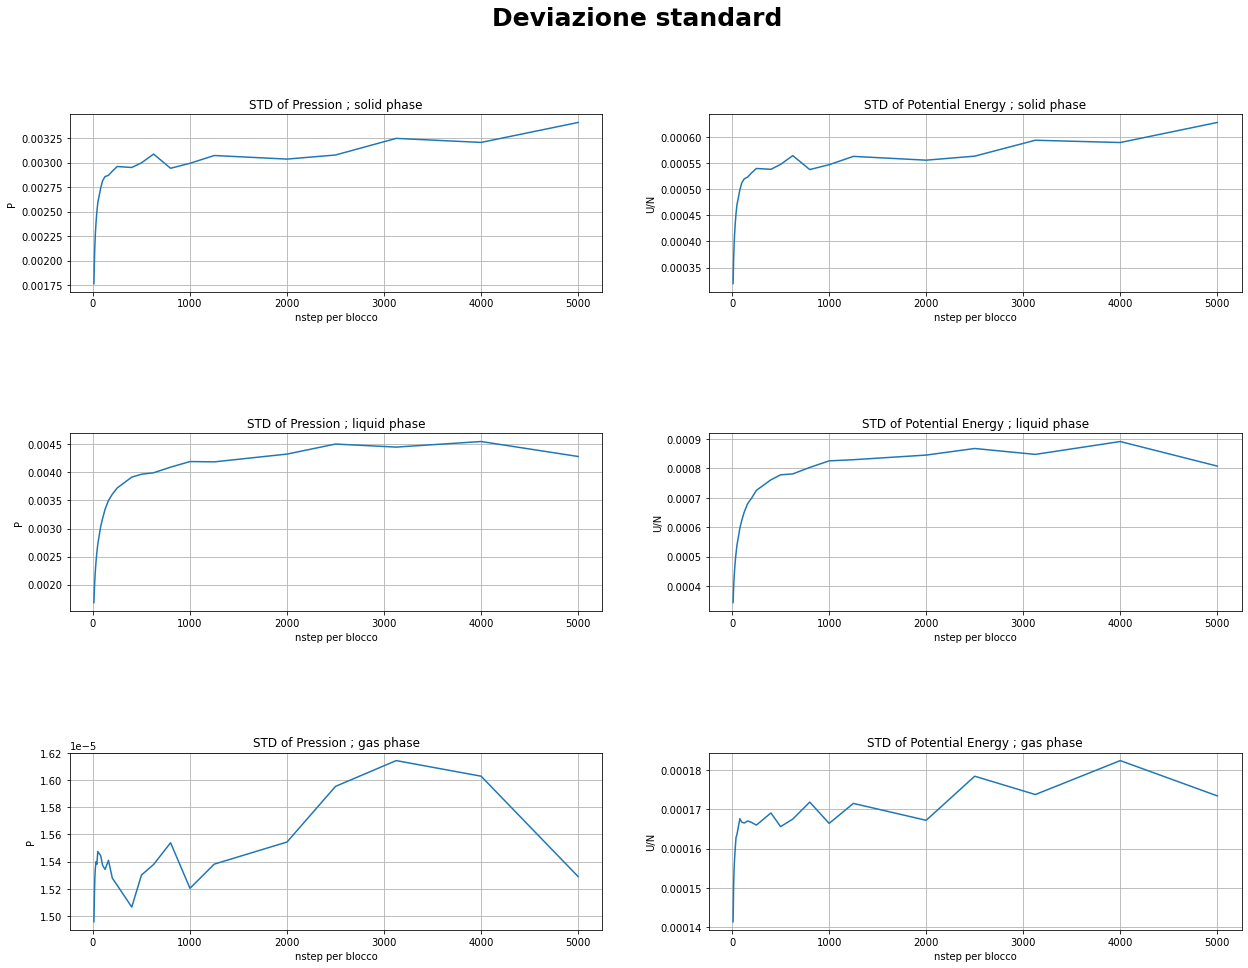

In [115]:
# Carico TUTTI i valori sugli array

plt.figure(figsize=(21,15))
plt.suptitle("Deviazione standard",fontweight = "bold", fontsize = 25)

graph = 1
for i in range(0,3):
    nblk,ave_P = np.loadtxt("Ex-7/NVT/Dati_sim/07.2/"+Fase[i]+"/output_press.dat", usecols = (0,1), delimiter = None, unpack = 'true')
    plt.subplot(3,2,graph)
    plt.title("STD of Pression ; "+Fase[i]+" phase")
    error_P = sigma_data_block(ave_P,L)     
    plt.plot(L,error_P)
    plt.xlabel("nstep per blocco")
    plt.ylabel("P")
    plt.grid()
    graph +=1
    
    nblk,ave_U = np.loadtxt("Ex-7/NVT/Dati_sim/07.2/"+Fase[i]+"/output_epot.dat", usecols = (0,1), delimiter = None, unpack = 'true')
    plt.subplot(3,2,graph)
    plt.title("STD of Potential Energy ; "+Fase[i]+" phase")
    error_U = sigma_data_block(ave_U,L)     
    plt.plot(L,error_U)
    plt.xlabel("nstep per blocco")
    plt.ylabel("U/N")
    plt.grid()
    graph +=1
        
plt.subplots_adjust(hspace=0.8) #separa la griglia di grafici        
plt.show()
    

Si osserva per $L \gg 2000$ l' errore ha raggiunto la saturazione, in tutte e $3$ le fasi. Inoltre, i valori di $L$ che garantiscono la validità del limite centrale, sono sufficientemente alti affinchè non vi sia correlazione tra le varie misure.  In **conclusione**, ponendo `nstep` $\approx 2000-3000$, le incertezze statistiche seguono il teorema del limite centrale e i dati non sono più correlati.

Mi sarei aspettata una saturazione più marcata.

## Exercise 07.3
Includo nel codice un algoritmo che permette di calcolare la **funzione di distribuzione radiale** $g(r)$, nell' intervallo $r \in [0;L/2]$, dove $r$ è  il modulo della distanza radiale tra due particelle.

La $g(r)$ descrive la probabilità di trovare due particelle a una distanza *r*, rispetto alla probabilità attesa : ovvero descrive di quanto si discosta la probabilità media di trovare due particelle a distanza *r*, rispetto alla probabilità completamente casuale di un sistema ideale, alla stessa distanza *r*. Fornisce quindi molte informazioni sulla struttura del fluido in esame. In termodinamica permette di valutare molte proprietà microscopiche.


L' espressione analitica della $g(r)$ è data da:

$$
g(r) = \frac{1}{\rho N \Delta V(r)}\langle\sum_{i=1}^{N}\sum_{j=1,j\neq i}\delta(r-|\vec{r_i}-\vec{r_j})\rangle
$$

dove $\Delta V= \frac{4\pi}{3}[(r+dr)^3 - r^3]$ è il volume del guscio sferico in cui è cercata la particella.

Per implementare il calcolo, ho eseguito i seguenti passaggi:

1. suddiviso l' intervallo $[0;L/2]$ in 100 sotto-intervalli di lunghezza $dr = L/200$. Ciascun sotto- intervallo corrisponde a un bin in cui cade la distanza radiale che separa due particelle durante la simulazione.
2. Durante `Measure()`, ciclando sulle coppie, ogni qual volta che la distanza $r$ cade all' interno di un sotto-intervallo *j-esimo*, viene incrementata di $2$ una variabile che indica il numero di particelle che si trovano a una distanza compresa tra $[(j-1)\times dr,j\times dr]$.
3. Una volta finita la simulazione, i valori ottenuti sono normalizzati, dividendoli per $Norm = \rho N \Delta V$.

I dati finali, ovvero i valori medii della frequenza in ciascun bin, con le relative incertezze statistche, sono salvati nei file `07.4/<phase>/rad_distr.dat`: ogni colonna rappresenta un bin , mentre ogni riga il valore medio di frequenze per il determinato bin, nel relativo blocco .L'errore è contenuto invece in `07.4/<phase>/rad_distr_err.dat`.

***Osservazione***: a seguito dello studio che è stato svolto in *Exercise 07.2* ho deciso di utilizzare `nblk`$=50$ ( ho scelto un numero basso per ridurre le tempistiche di calcolo) blocchi di lunghezza `nstep`$=2500$ ciascuno.

I risultati sono mostrati assieme agli altri, nell'**esercizio 07.4**

In [118]:
simulaz = ["NVT","NVE"]

In [140]:
#==== Media delle frequenze in ciascun bins=====
nbins = 100
nblk = 50 
bins = np.zeros(nbins)
#==== variabili NVE=====    
frequenza_NVE = np.zeros(nbins)
ave_gdr_NVE = np.zeros(nbins)
errore_freq_NVE = np.zeros(nbins)
err_gdr_NVE = np.zeros(nbins)

ave_gdr_tot_NVE = []
err_gdr_tot_NVE = []
#===== Variabili NVT=====    
frequenza_NVT = np.zeros(nbins)
ave_gdr_NVT = np.zeros(nbins)
errore_freq_NVT = np.zeros(nbins)
err_gdr_NVT = np.zeros(nbins)

ave_gdr_tot_NVT = []
err_gdr_tot_NVT = []

for f in range (0,3):    # ciclo su Fasi
    ave_gdr_NVE = np.zeros(nbins)
    err_gdr_NVE = np.zeros(nbins)
    
    ave_gdr_NVT = np.zeros(nbins)
    err_gdr_NVT = np.zeros(nbins)
    
    for i in range(0,nblk-1):
        frequenza_NVE = np.loadtxt("Ex-7/NVE/Dati_sim/07.4/"+Fase[f]+"/rad_distr.dat", delimiter = None, unpack = 'true',skiprows =i,max_rows = 1)
        frequenza_NVT = np.loadtxt("Ex-7/NVT/Dati_sim/07.4/"+Fase[f]+"/rad_distr.dat", delimiter = None, unpack = 'true',skiprows =i,max_rows = 1)
        errore_freq_NVE = np.loadtxt("Ex-7/NVE/Dati_sim/07.4/"+Fase[f]+"/rad_distr_err.dat", delimiter = None, unpack = 'true',skiprows =i,max_rows = 1)
        errore_freq_NVT = np.loadtxt("Ex-7/NVT/Dati_sim/07.4/"+Fase[f]+"/rad_distr_err.dat", delimiter = None, unpack = 'true',skiprows =i,max_rows = 1)
        
        for j in range(0,nbins):
            ave_gdr_NVE[j] +=frequenza_NVE[j]
            ave_gdr_NVT[j] +=frequenza_NVT[j]
            err_gdr_NVE[j] += errore_freq_NVE[j] 
            err_gdr_NVT[j] += errore_freq_NVT[j]  

        err_gdr_NVE /=nbins
        ave_gdr_NVE /= nbins
        
        err_gdr_NVT /=nbins
        ave_gdr_NVT /= nbins
        
    ave_gdr_tot_NVE.append(ave_gdr_NVE)
    err_gdr_tot_NVE.append(err_gdr_NVE)
    ave_gdr_tot_NVT.append(ave_gdr_NVT)
    err_gdr_tot_NVT.append(err_gdr_NVT)
        
for i in range(0,nbins):
        bins[i] = i+1

## Exercise 07.4
Il codice aggiornato è stato usato per fare per eseguire l'effettiva simulazione **MC** e **MD** dell'*Argon*, secondo il modello di Lennard-Jones, sia nell'ensamble microcanonico(NVE), che nell' ensamble canonico(MVT).

Le simulazioni sono state svolte con i parametri:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

dove però,per la simulazione **MD** sono stati usati i valori di $T_{iniz}$ trovati nel [Laboratorio 4](https://github.com/ChiaraBallotta/LSN_Ballotta_Chiara/blob/master/Laboratorio4/Ex-4.ipynb). Dunque la temperatura  cui avviene la simulazione *NVE* coincide con quella fissata per la simulazione *NVT*.

Di seguito sono illustrati i valori medii dell' energia potenziale $U/N$ e della pressione $P$ e della distribuzione radiale $g(r)$, con le relative incertezze.

Per semplificare la gestione dei calcoli ho creato una funzione che esegue l'ottimizzazione in autonomia, prima di procedere con la simulazione.Per assicurarsi che funzioni a dovere è necessario porre  ` restart = 0 `  e  ` ottimizzazione_inclusa `  = 0;


In [136]:
Fase = ["solid","liquid","gas"]
Quantità = ["epot","press",]
Label = ["U/N","P"]
simulaz = ["NVT","NVE"]
title = ["Energia potenziale, per particella","Pressione"]


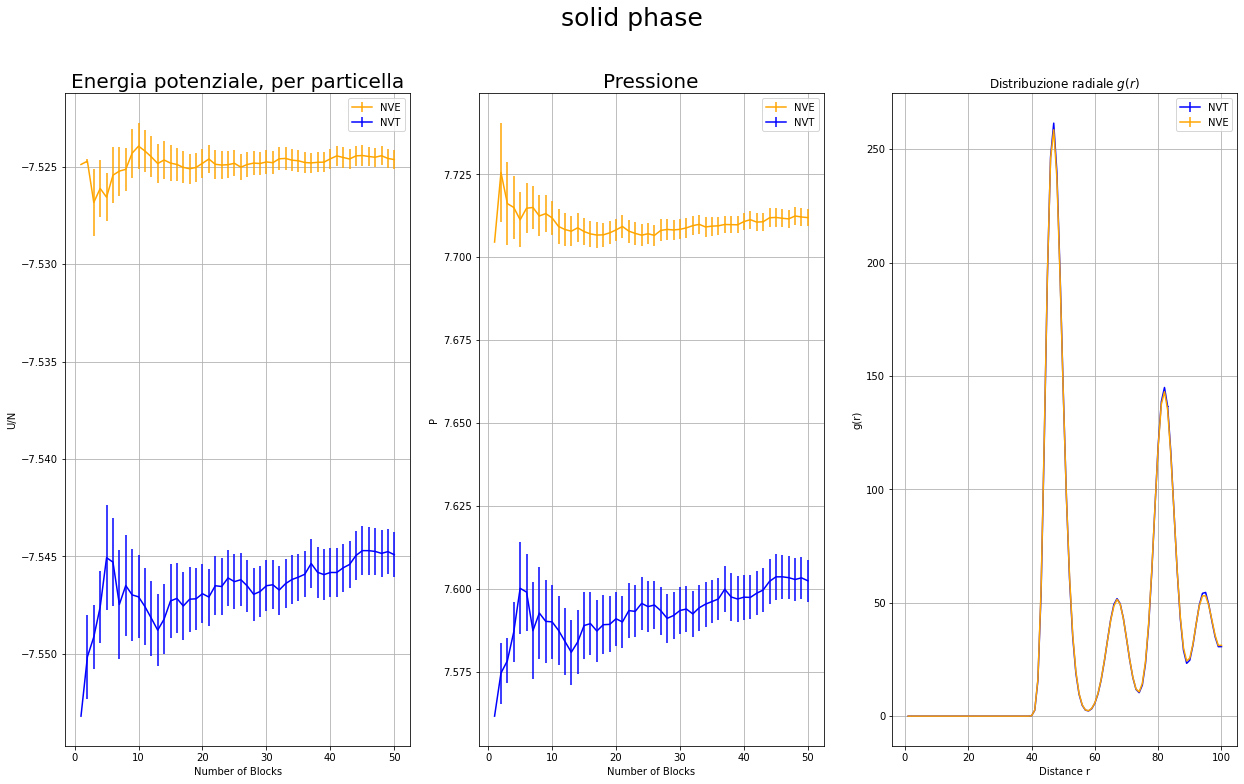

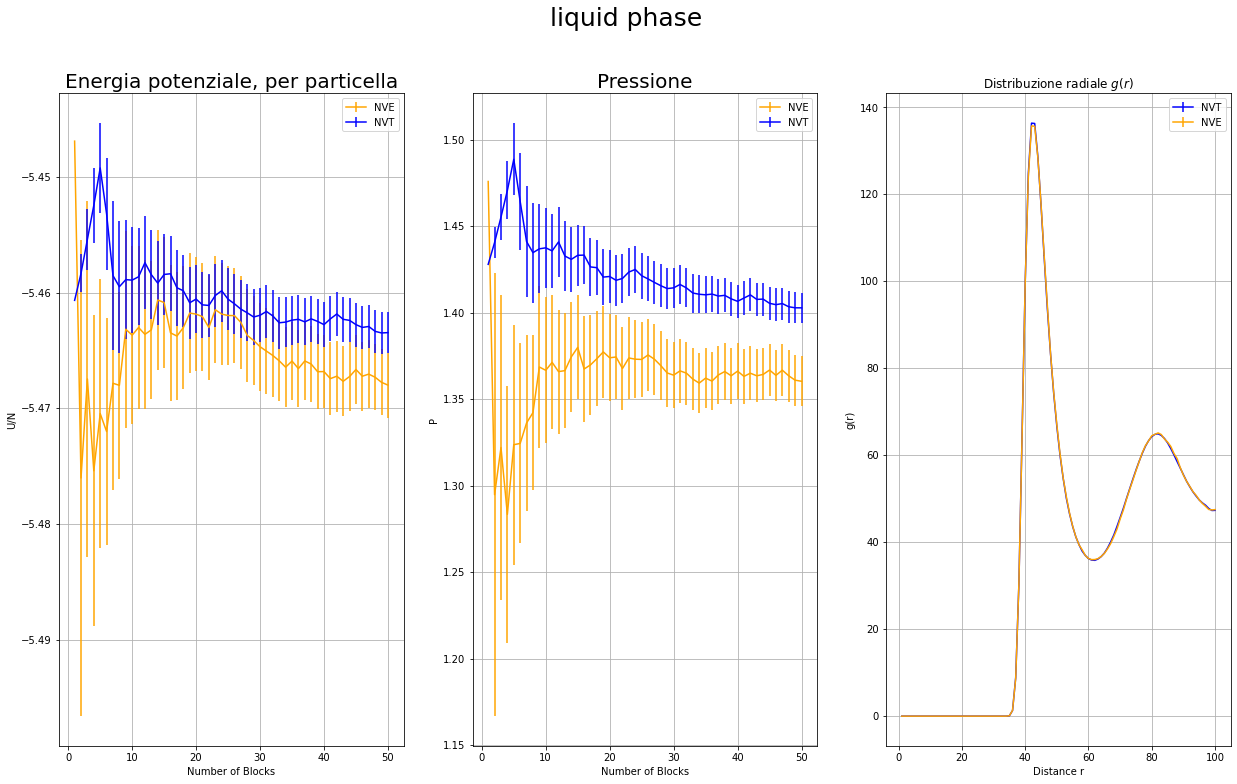

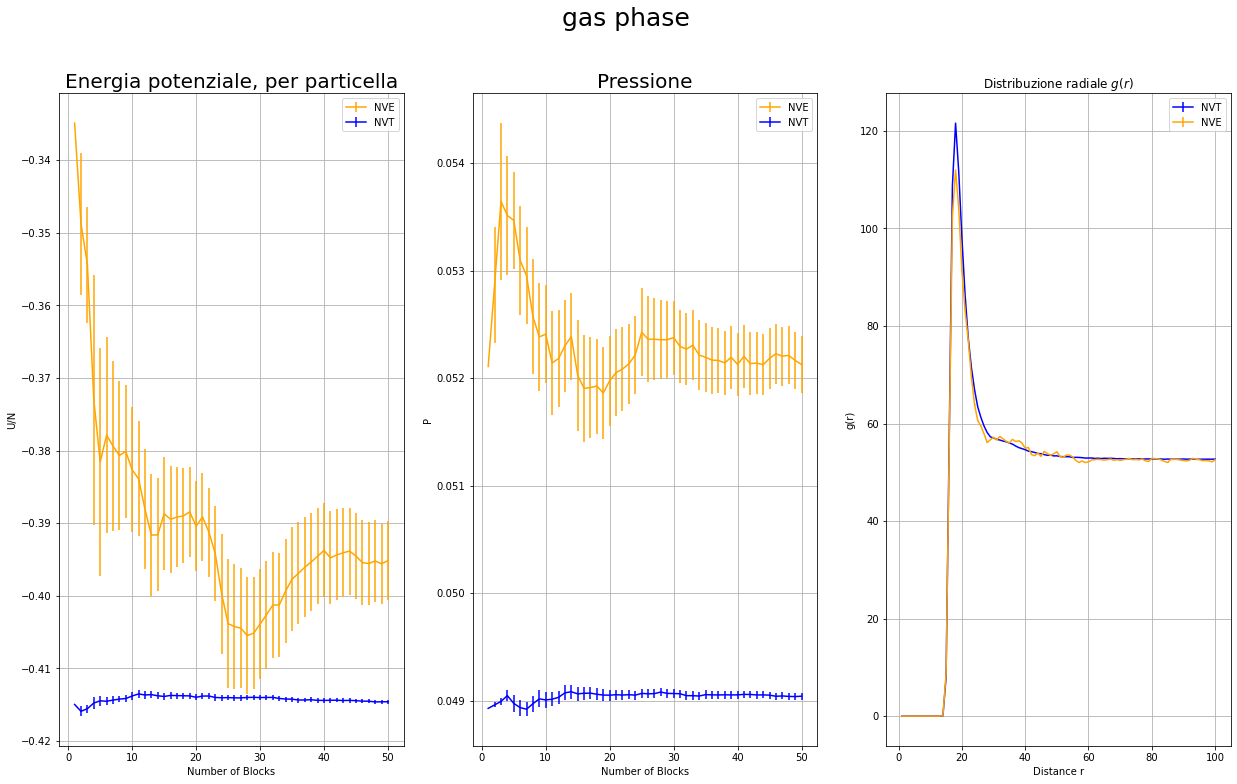

In [142]:
for i in range (0,3):      #Fase
    plt.figure(figsize=(21,12))
    plt.suptitle(Fase[i]+" phase", fontsize = 25)
    for j in range (0,2):      # U/N e P
        plt.subplot(1,3,j+1)
        nblk,ave_NVE,err_NVE = np.loadtxt("Ex-7/NVE/Dati_sim/07.4/"+Fase[i]+"/output_"+Quantità[j]+".dat", usecols = (0,2,3), delimiter = None, unpack = 'true')
        plt.errorbar(nblk,ave_NVE ,yerr=err_NVE, label = 'NVE',color = "orange")
        
        nblk,ave_NVT,err_NVT = np.loadtxt("Ex-7/NVT/Dati_sim/07.4/"+Fase[i]+"/output_"+Quantità[j]+".dat", usecols = (0,2,3), delimiter = None, unpack = 'true')
        plt.errorbar(nblk,ave_NVT ,yerr=err_NVT, label = 'NVT',color = "blue")
        
        plt.xlabel('Number of Blocks')        
        plt.ylabel(Label[j])
        plt.title(title[j], fontsize = 20)
        plt.grid(True)
        plt.legend()
    # g(r)
    plt.subplot(1,3,3)
    plt.errorbar(bins,ave_gdr_tot_NVT[i],err_gdr_tot_NVT[i],color = "blue",label="NVT")
    plt.errorbar(bins,ave_gdr_tot_NVE[i],err_gdr_tot_NVE[i],color = "orange",label="NVE")
    plt.title("Distribuzione radiale $g(r)$")
    plt.xlabel("Distance r")
    plt.ylabel("g(r)")
    plt.grid(True)
    plt.legend()
    
    plt.show()

**Osservazioni**:
-  I profili della $g(r)$ soni coerente con il potenziale di *Lennard-Jones*, infatti non troviamo nessuna particella al di sotto di una certa distanza, coerente con il termine repulsivo di *core*. Le particelle sembrano concentrarsi in zone ben definite, come se si disponessero in *shell* concentriche attorno alla particella di riferimento. Le $g(r)$ calcolate nei due ensamble ( microcanonico per NVE e canononico per NVT) sono compatibili tra di loro. I due sistemi, sebbene siano studiati mediante tecniche diverse, a livello spaziale risultano essere indistinguibili;conferma che la fase di equlibrizzazione svolta è stata efficientemente: i due ensamble sono stati simulati in condizioni termodinamiche molto simili.

-  I risultati delle simulazioni **MD** e **MC** non sono compatibili per le due osservabili osservate. Nel *Laboratorio 4* era stato osservato come la temeratura a cui opera l' Algoritmo di Verlet non rimanga costante, ma piuttosto oscilli attorno a un valore fisso, mentre l'algoritmo di Metropolis lavora a una temperatura fissata in *input*. Il fatto che la temperatura non rimanga costante durante *MD* e il fatto che $T_{iniz}$ stessa sia stata scelta con un metodo euristico, potrebbero concorrere a rendere le misure incompatibili. Sebbene le misure siano incompatibili, la scala delle  misure è compatibile.